## Download and Import all Required libraries and Datasets

In [2]:
!pip install ucimlrepo
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

##Analyzing the uploaded Data

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [7]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [10]:
X.shape

(303, 13)

In [11]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [13]:
y.head(10)

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [14]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


## Finding Missing value

<Axes: >

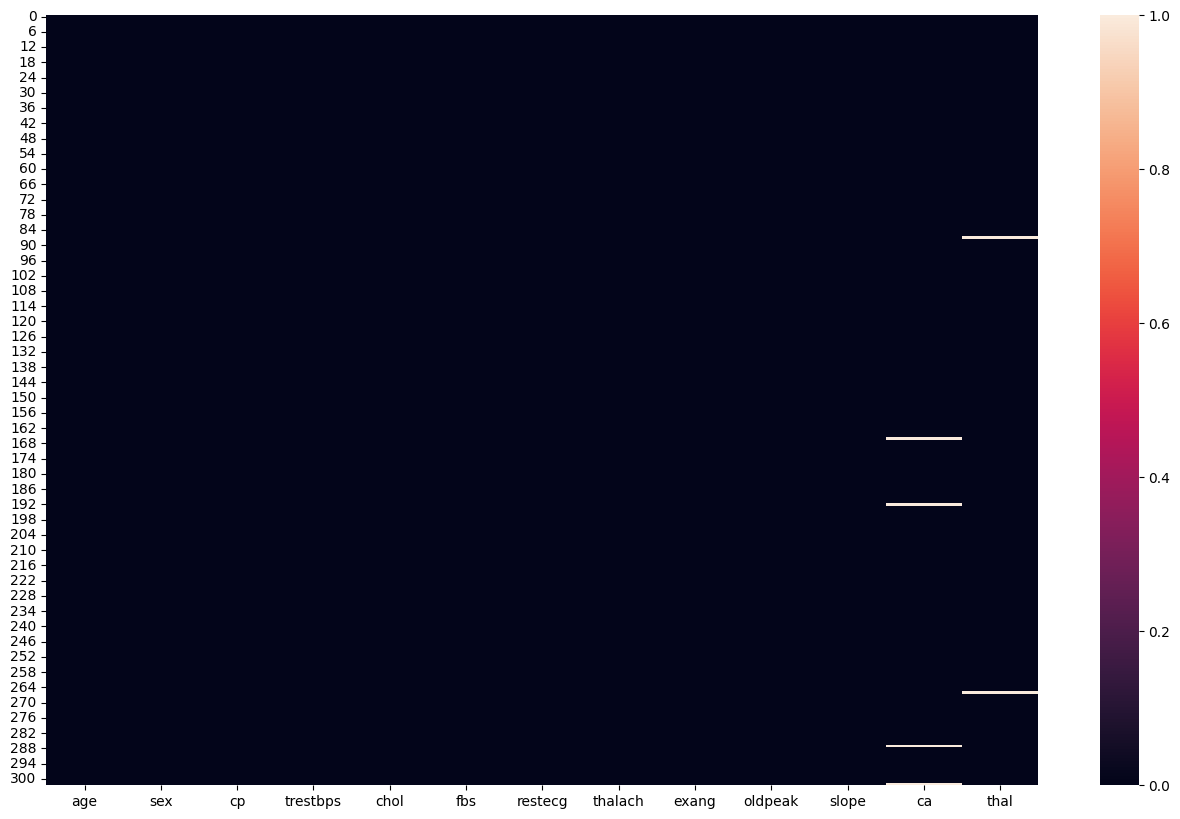

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(X.isnull())

<Axes: >

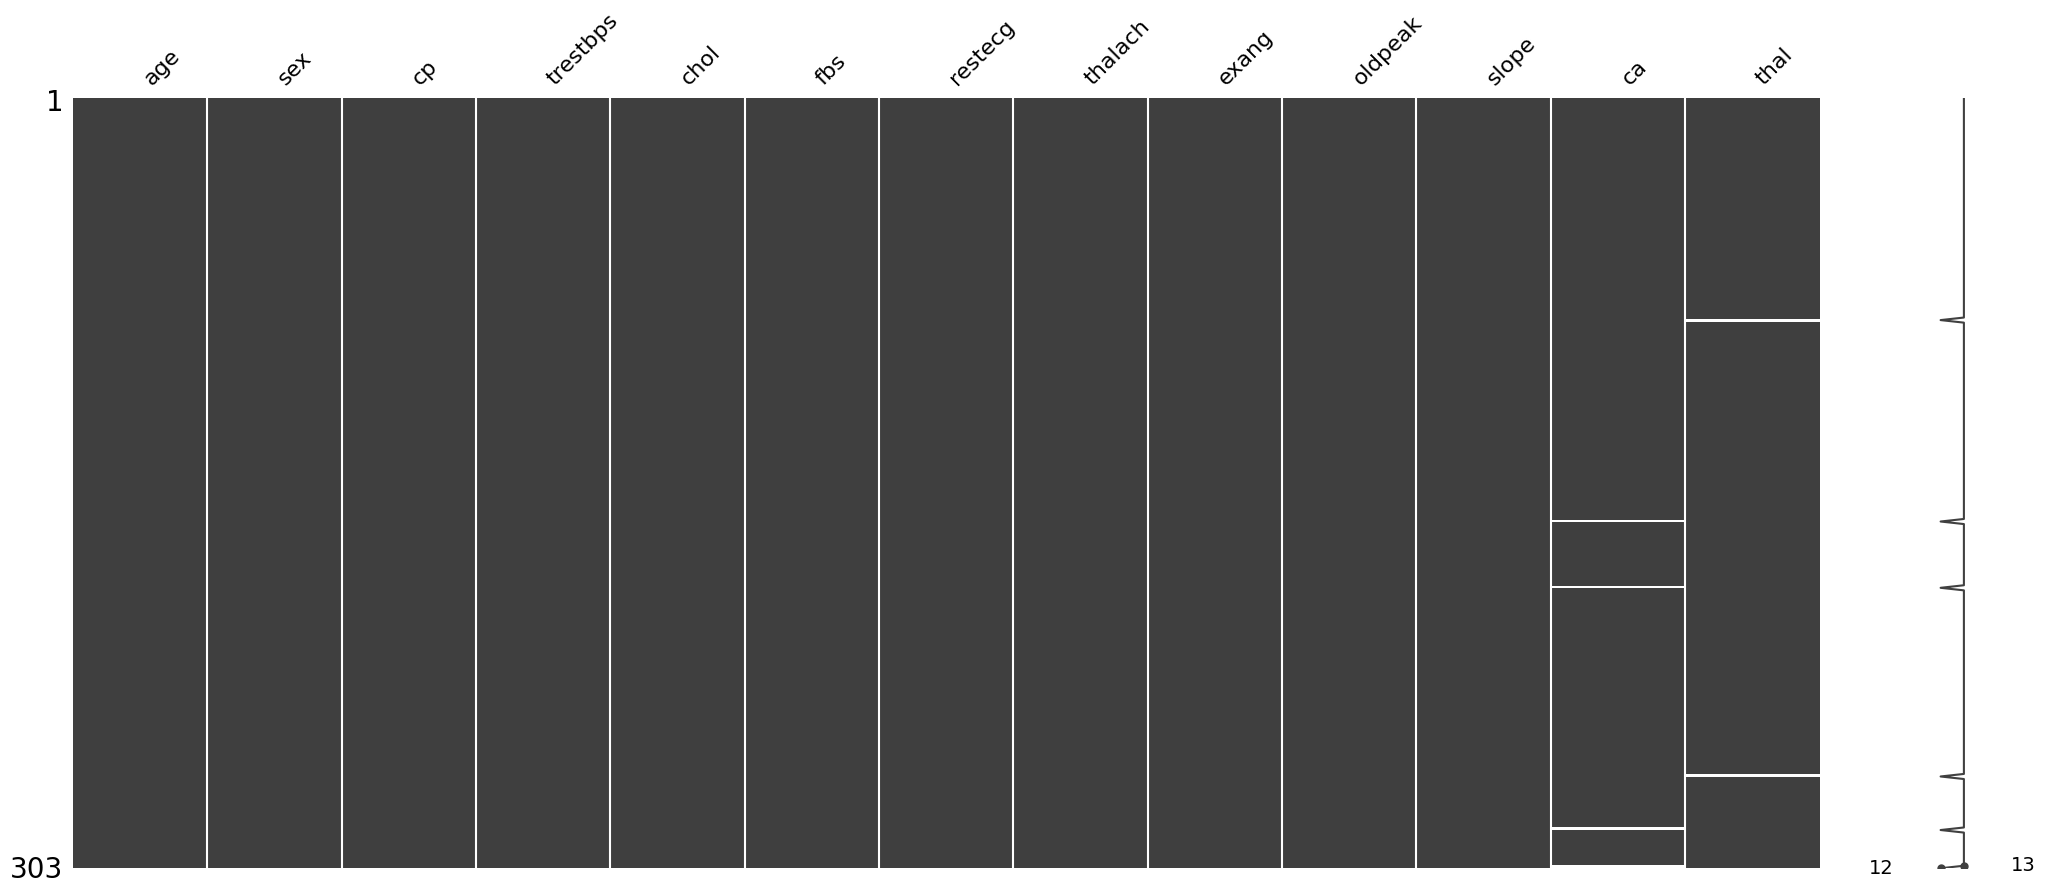

In [16]:
msno.matrix(X)

In [17]:
miss_percent = X.isnull().sum()/X.shape[0]*100
miss_percent

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
dtype: float64

In [18]:
col_names=X.keys()

## Analysing Data skewness and Outiliers

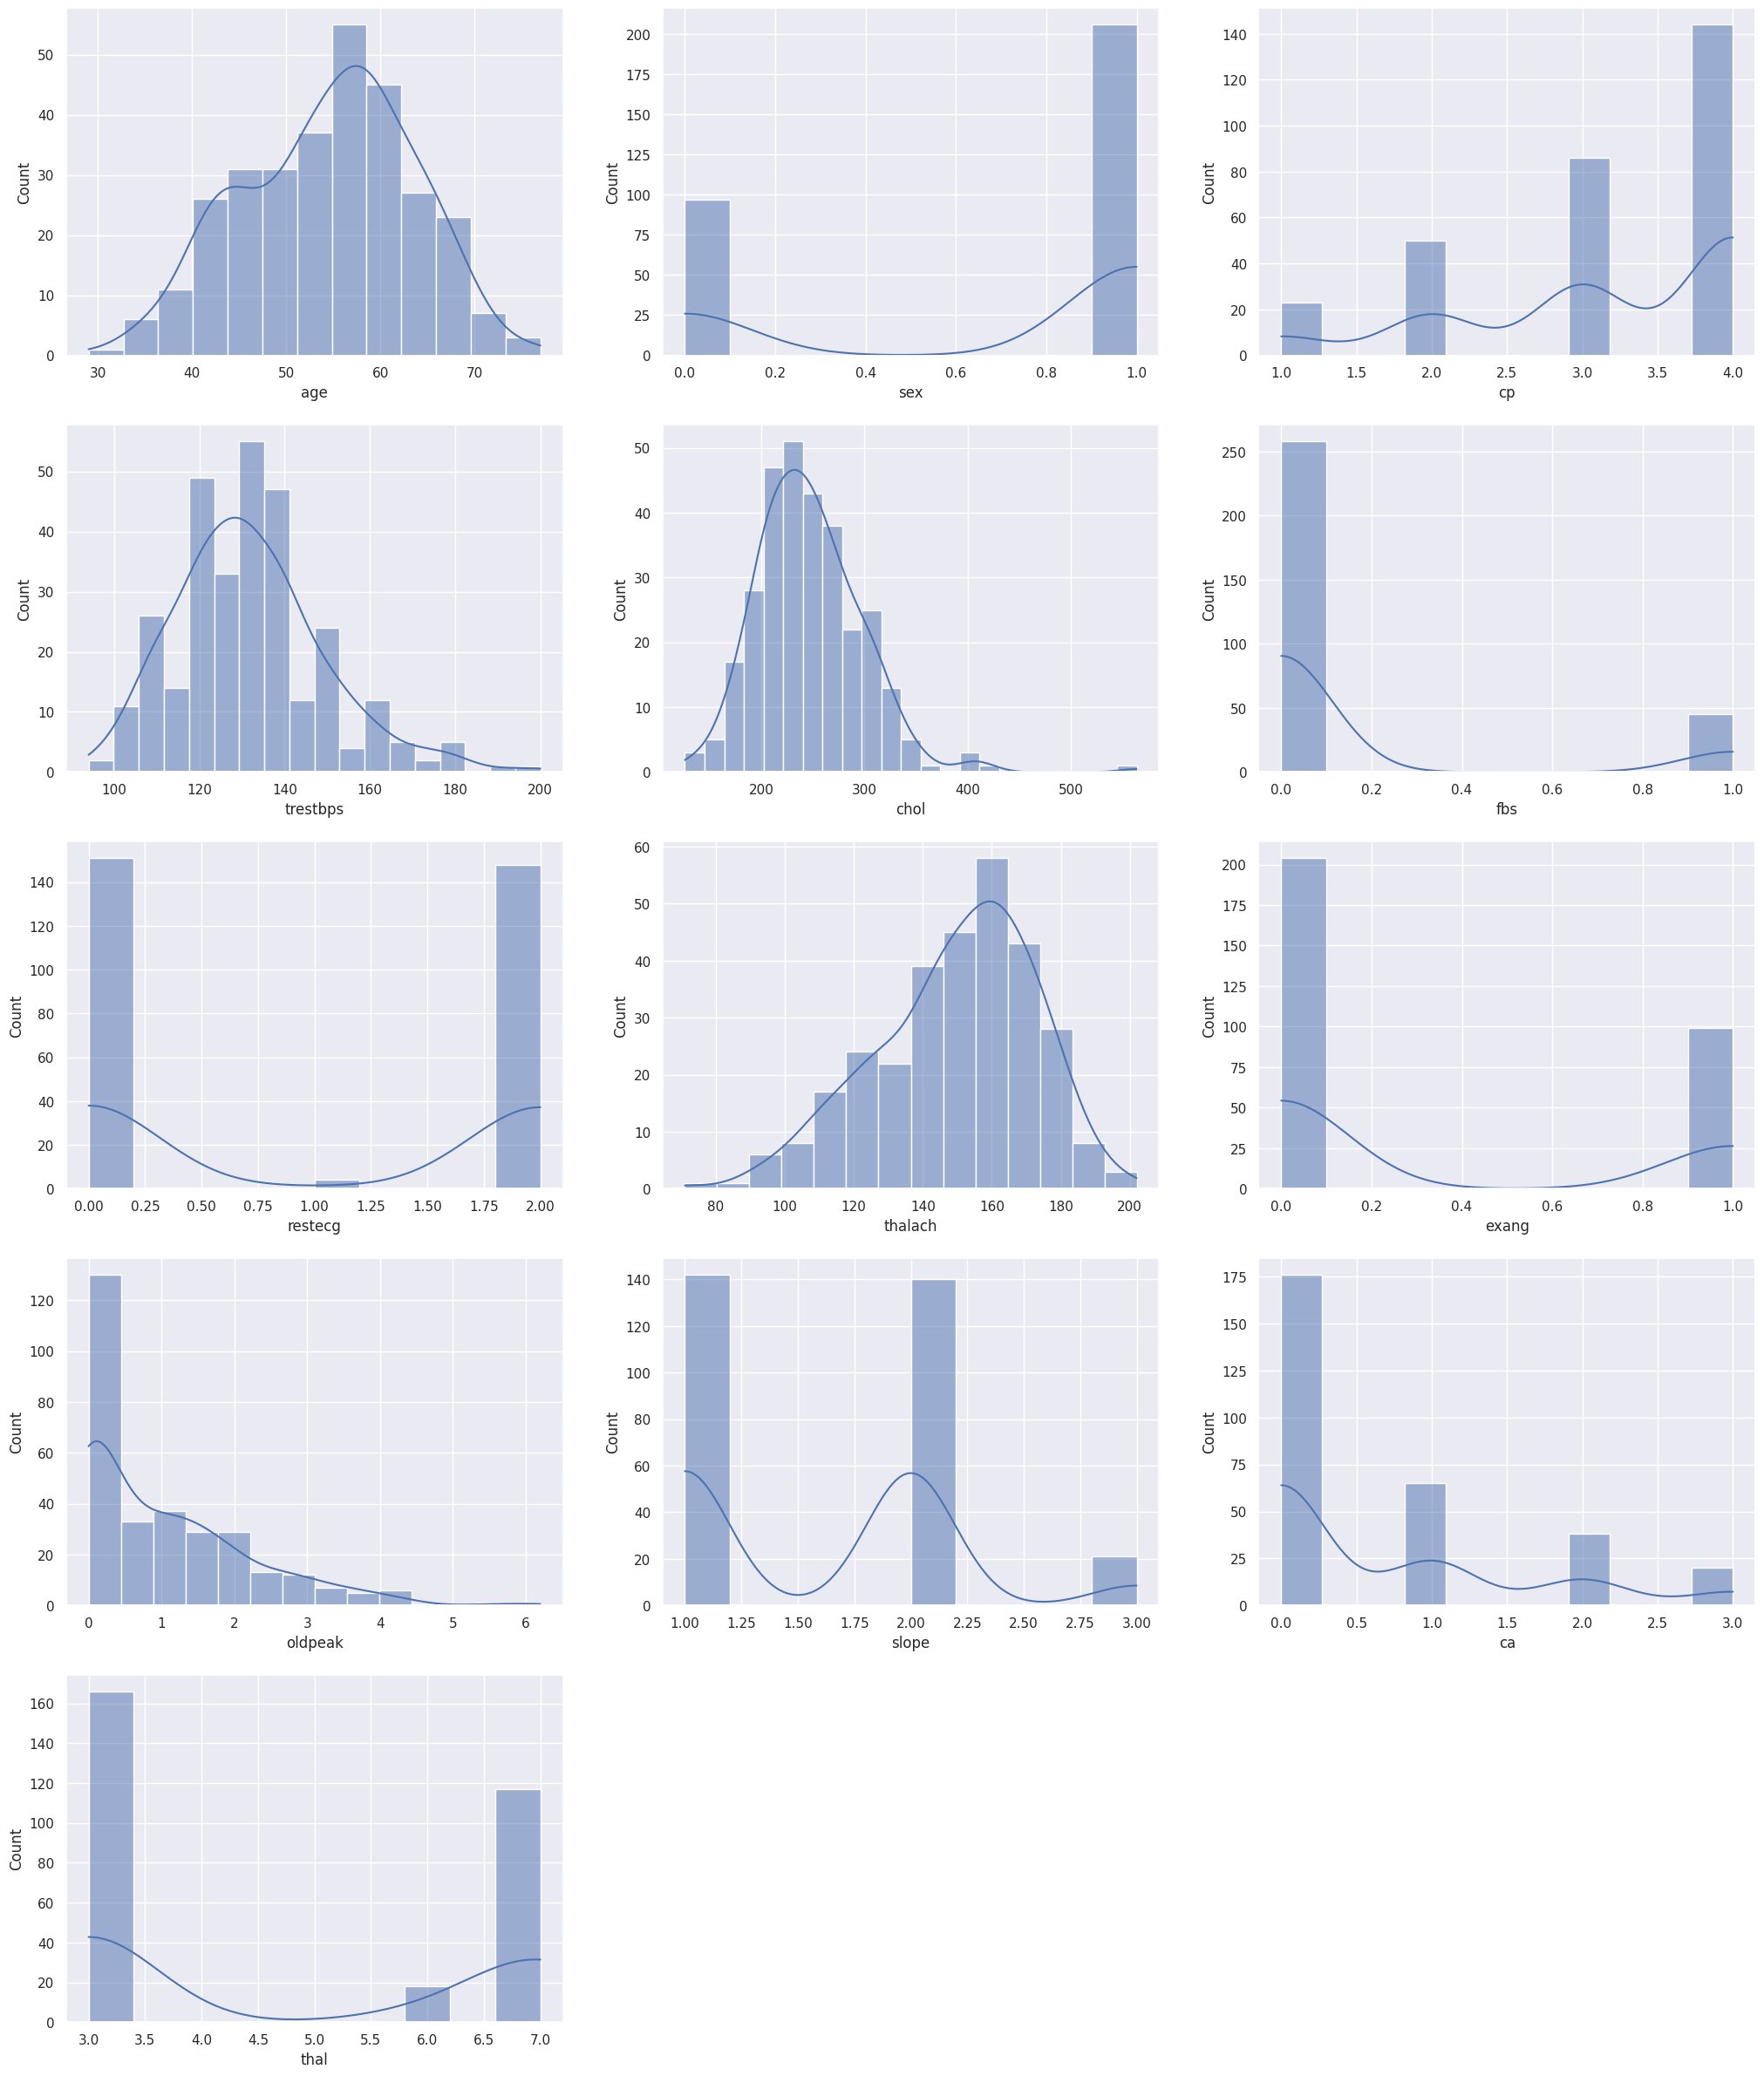

In [19]:
plt.figure(figsize=(25,30))
sns.set_theme()
for i,col in enumerate(col_names):

  plt.subplot(5,3,i+1)
  sns.histplot(X[col],kde=True)

In [20]:
X_copy = X.copy()

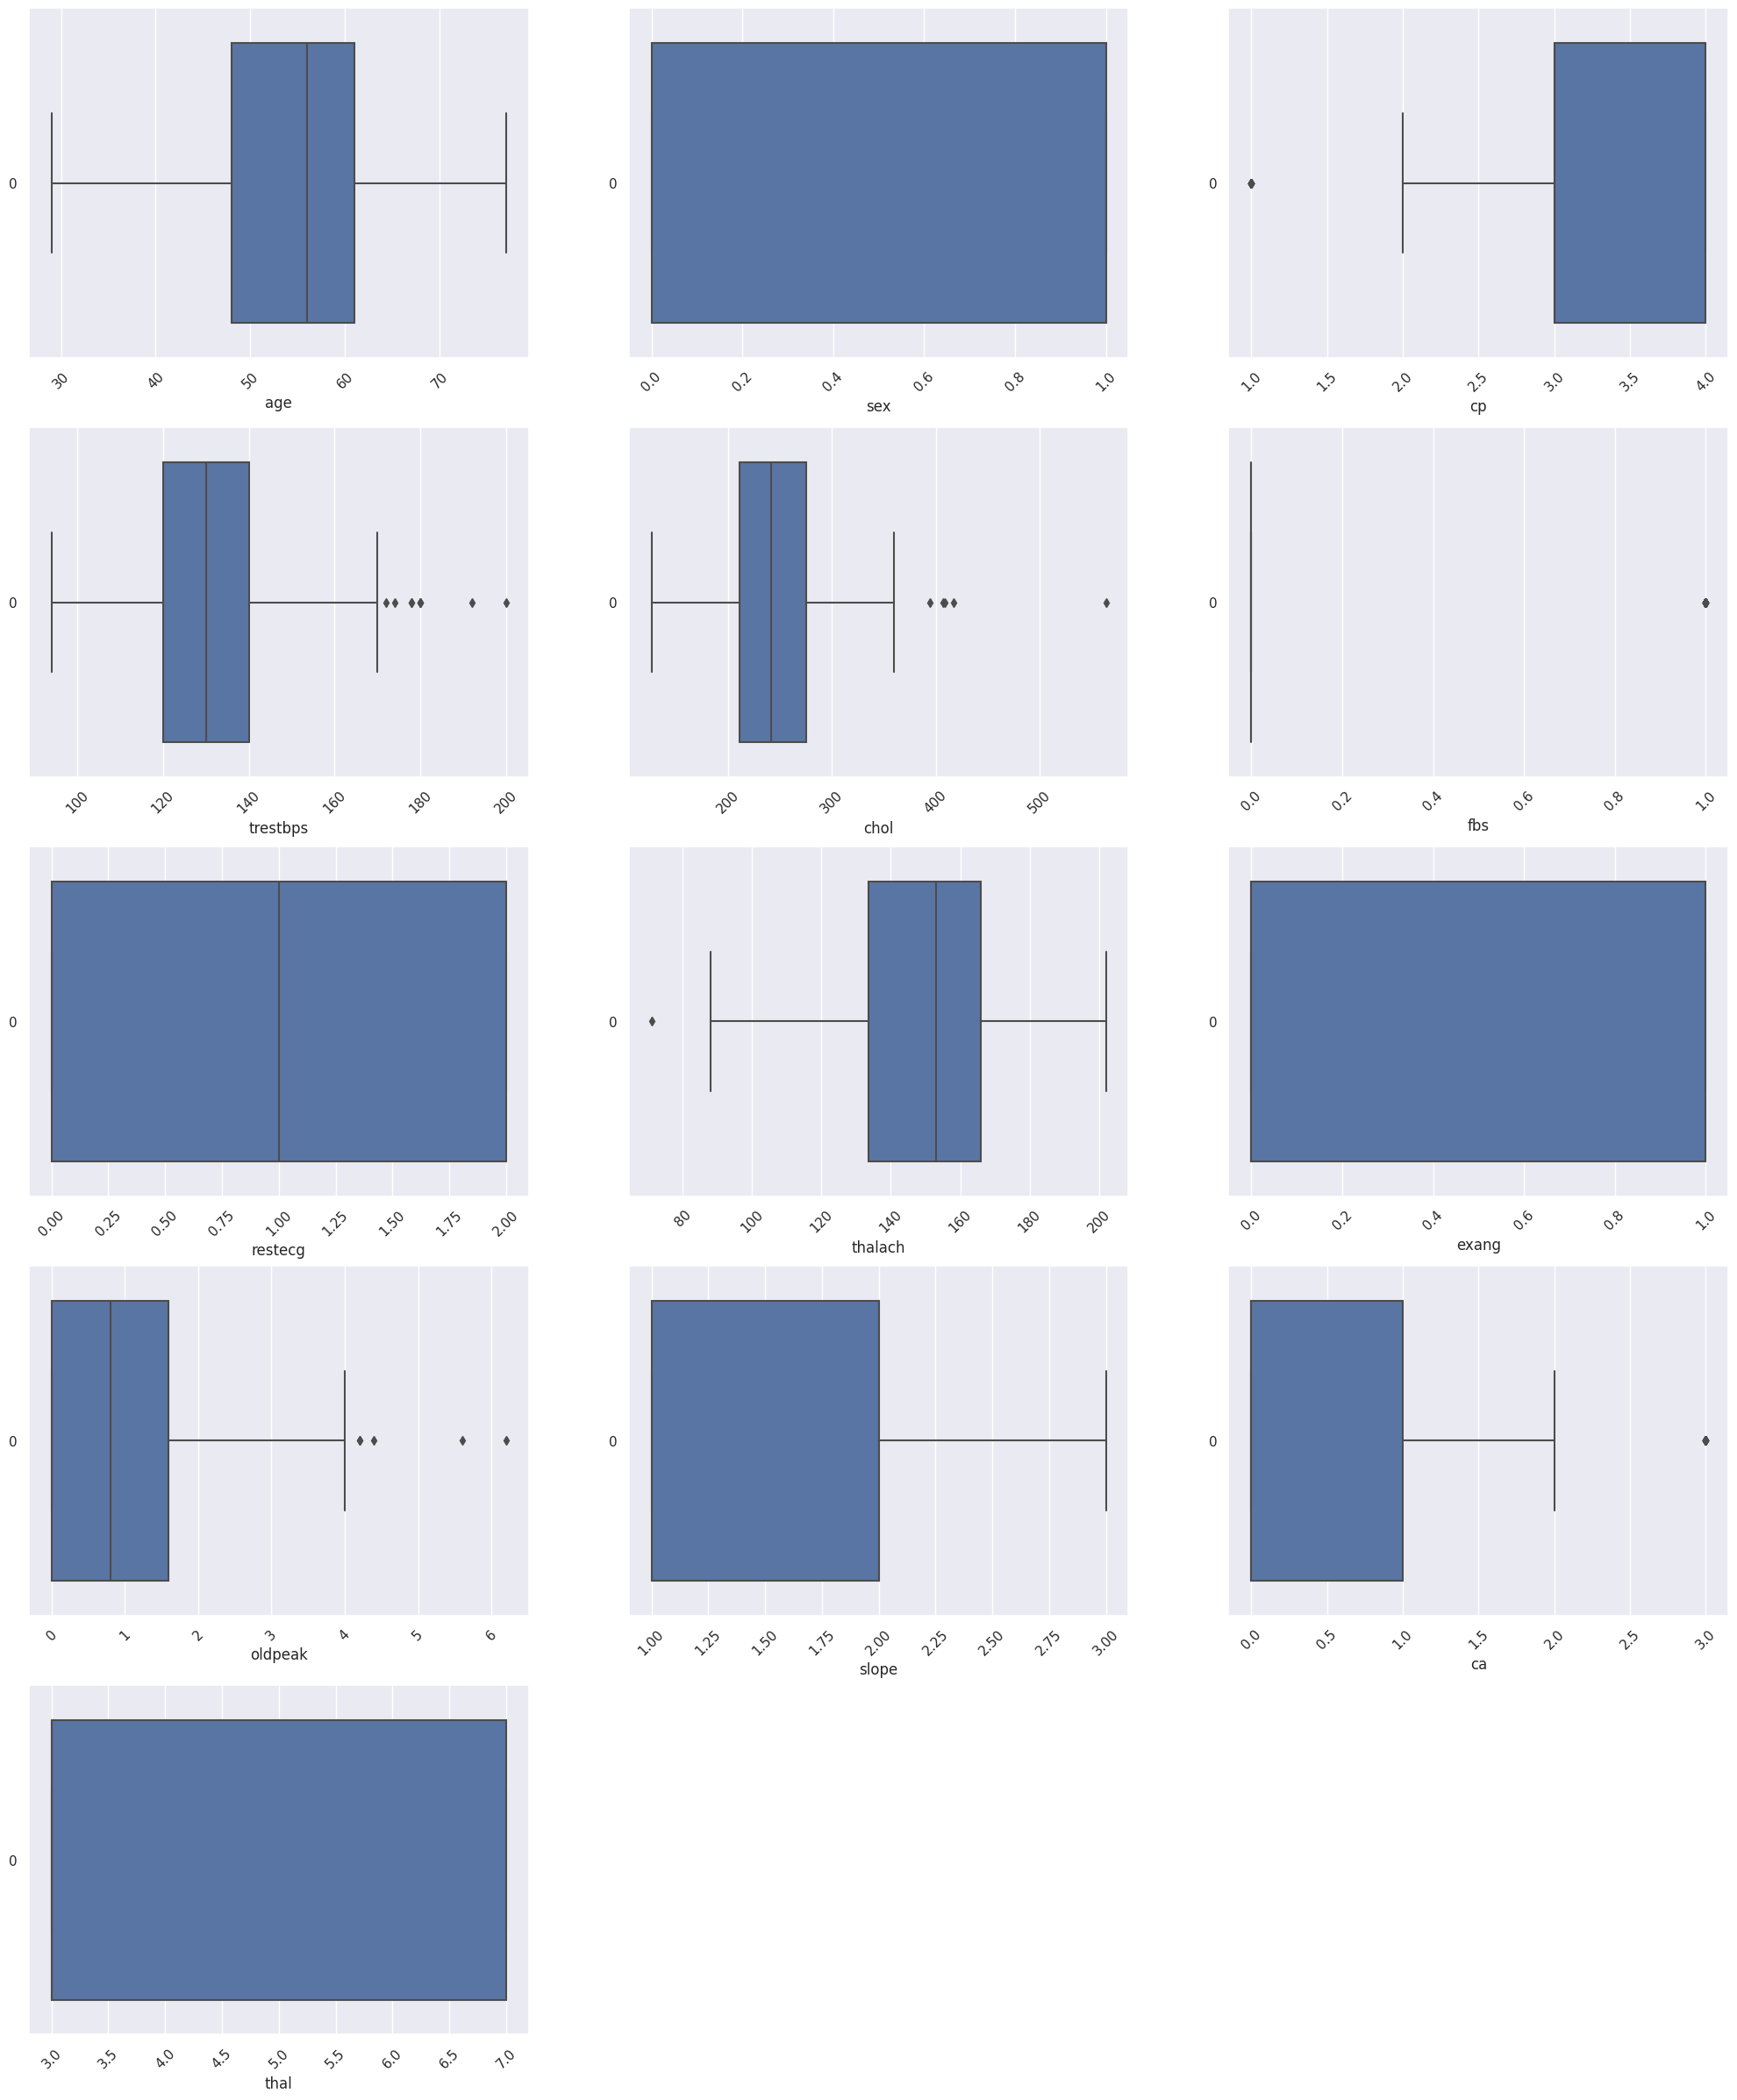

In [21]:
#outlier
plt.figure(figsize=(25,30))
for i,col in enumerate(X.keys()):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[col],orient= 'h')
  plt.xlabel(col)
  plt.xticks(rotation=45)

##Missing value Imputation

In [22]:
# Missing value Imputation
print('Missing value impute with mean value in ca is',X['ca'].mean().round())
X_copy['ca']= X['ca'].fillna(X['ca'].mean().round())

Missing value impute with mean value in ca is 1.0


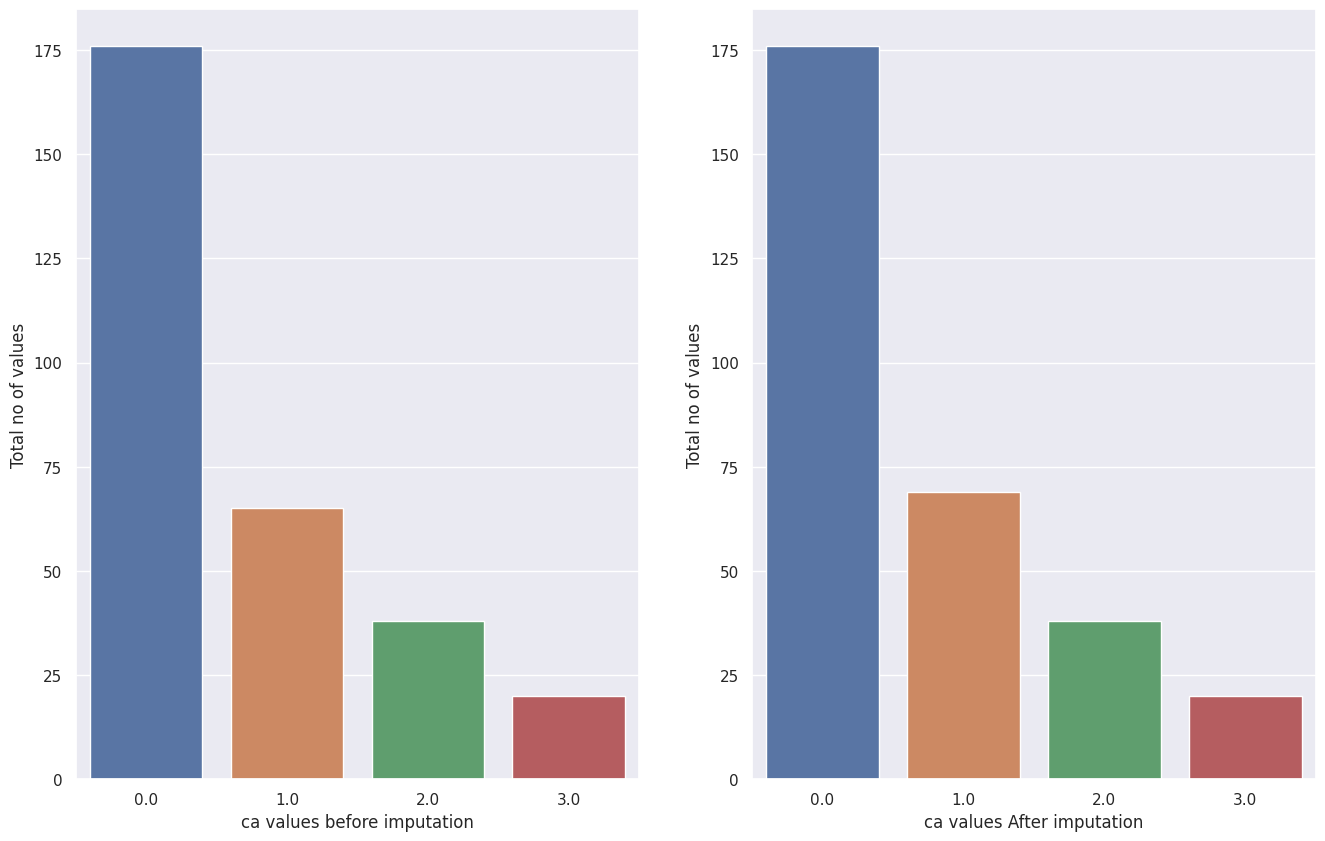

In [23]:

plt.figure(figsize=(16,10))
plt.subplot(121)
sns.countplot(data=X,x=X['ca'])
plt.xlabel('ca values before imputation')
plt.ylabel('Total no of values')
plt.subplot(122)
sns.countplot(data=X_copy,x=X_copy['ca'])
plt.xlabel('ca values After imputation')
plt.ylabel('Total no of values')
plt.show()
#plt.title('Comparision of data Before and After Imputation')

In [24]:
print('Missing value in thal impute with mean value',X['thal'].median())
X_copy['thal']= X['thal'].fillna(X['thal'].median())

Missing value in thal impute with mean value 3.0


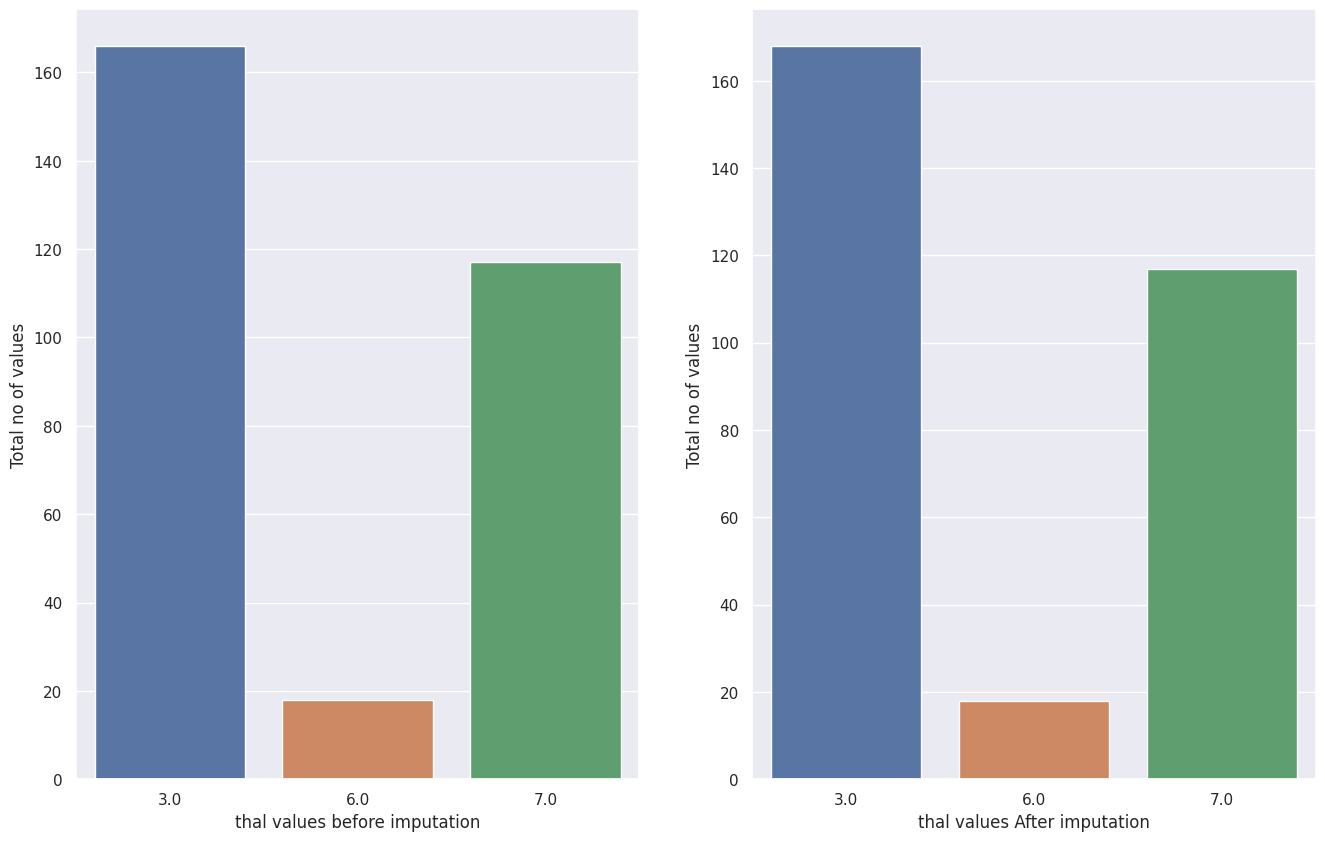

In [25]:
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.countplot(data=X,x=X['thal'])
plt.xlabel('thal values before imputation')
plt.ylabel('Total no of values')
plt.subplot(122)
sns.countplot(data=X_copy,x=X_copy['thal'])
plt.xlabel('thal values After imputation')
plt.ylabel('Total no of values')
plt.show()
#plt.title('Comparision of data Before and After Imputation')

##Feature Engineering

In [26]:
# Asper Domain knowledge data can distribute in numerical and categorical features

In [27]:
#cateorical Feature
cat_feature =['sex','cp','fbs','restecg','exang','slope','thal']

In [28]:
X_copy[cat_feature].head(10)

,sex,cp,fbs,restecg,exang,slope,thal
0,1,1,1,2,0,3,6.0
1,1,4,0,2,1,2,3.0
2,1,4,0,2,1,2,7.0
3,1,3,0,0,0,3,3.0
4,0,2,0,2,0,1,3.0
5,1,2,0,0,0,1,3.0
6,0,4,0,2,0,3,3.0
7,0,4,0,0,1,1,3.0
8,1,4,0,2,0,2,7.0
9,1,4,1,2,1,3,7.0


In [29]:
for col in cat_feature:
  print(col,'having uniques are',X_copy[col].unique())

sex having uniques are [1 0]
cp having uniques are [1 4 3 2]
fbs having uniques are [1 0]
restecg having uniques are [2 0 1]
exang having uniques are [0 1]
slope having uniques are [3 2 1]
thal having uniques are [6. 3. 7.]


In [30]:
#converting categorical values

In [31]:
#restecg

In [32]:
X_copy['restecg']= X['restecg'].map({0:1,1:2,2:3})
X_copy['restecg'].unique()

array([3, 1, 2])

In [33]:
#thal

In [34]:
X_copy['thal']= X_copy['thal'].astype(int)

In [35]:
X_copy['thal'].isnull().sum()

0

In [36]:
X_copy.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

##Training the Models

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_copy,y,test_size=0.2,random_state=100)

In [38]:
X_train.shape

(242, 13)

In [39]:
y_train.shape

(242, 1)

In [40]:
y_train =np.ravel(y_train)
y_train.shape

(242,)

In [41]:
sc = StandardScaler()
sc.fit(X_train)
X_trainsc = sc.transform(X_train)
X_testsc = sc.transform(X_test)

In [42]:
lgr= LogisticRegression()
lgr.fit(X_trainsc,y_train)
lgr.score(X_testsc,y_test)

0.7049180327868853

In [44]:
y_predict =lgr.predict(X_testsc)

In [45]:
confusion_matrix(y_test,y_predict)


array([[33,  0,  1,  0,  0],
       [ 3,  4,  1,  0,  0],
       [ 2,  1,  2,  3,  3],
       [ 0,  1,  1,  4,  2],
       [ 0,  0,  0,  0,  0]])

##Finding SHAP values and Visualization

In [46]:
# Calculate the SHAP values
explainer = shap.LinearExplainer(lgr,X_train)
shap_values = explainer(X_test)


In [47]:
shap_values

.values =
array([[[-5.01344182e-01, -2.07150213e-01, -1.11900046e+00,
          3.65158795e+00, -1.82409309e+00],
        [-1.28235280e-01,  6.75965114e-03,  3.39978502e-03,
         -6.36047099e-03,  1.24436315e-01],
        [ 1.27557610e-01,  2.61742955e-02, -1.19662317e-01,
         -8.57512077e-03, -2.54944673e-02],
        ...,
        [-1.40218224e-01, -2.15594102e-02, -1.14618607e-02,
          7.93584538e-02,  9.38810414e-02],
        [ 6.35775235e-01,  8.91371379e-02, -5.92967767e-02,
         -2.53352991e-01, -4.12262605e-01],
        [ 1.19896738e+00,  1.88849317e-01, -3.53415631e-01,
         -5.59007264e-01, -4.75393799e-01]],

       [[ 9.54941300e-02,  3.94571834e-02,  2.13142944e-01,
         -6.95540561e-01,  3.47446304e-01],
        [-1.28235280e-01,  6.75965114e-03,  3.39978502e-03,
         -6.36047099e-03,  1.24436315e-01],
        [-5.43798232e-01, -1.11585154e-01,  5.10139353e-01,
          3.65570938e-02,  1.08686940e-01],
        ...,
        [-1.40218224e-01, 

In [48]:
shap_values.shape

(61, 13, 5)

In [49]:
preds =lgr.predict(X_test)
import copy
shap_values2 = copy.deepcopy(shap_values)  # Creates a separate copy

new_shapval =[]
for i,pred in enumerate(preds):
  new_shapval.append(shap_values.values[i][:,pred])

shap_values2.values = np.array(new_shapval)
print(shap_values2.shape)

(61, 13)


X has feature names, but LogisticRegression was fitted without feature names


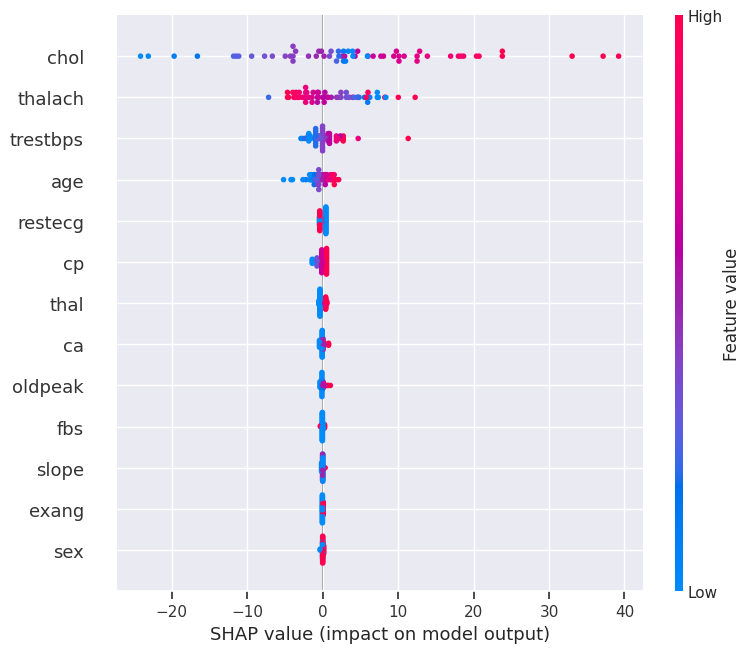

In [50]:
shap.summary_plot(shap_values2, X_test)

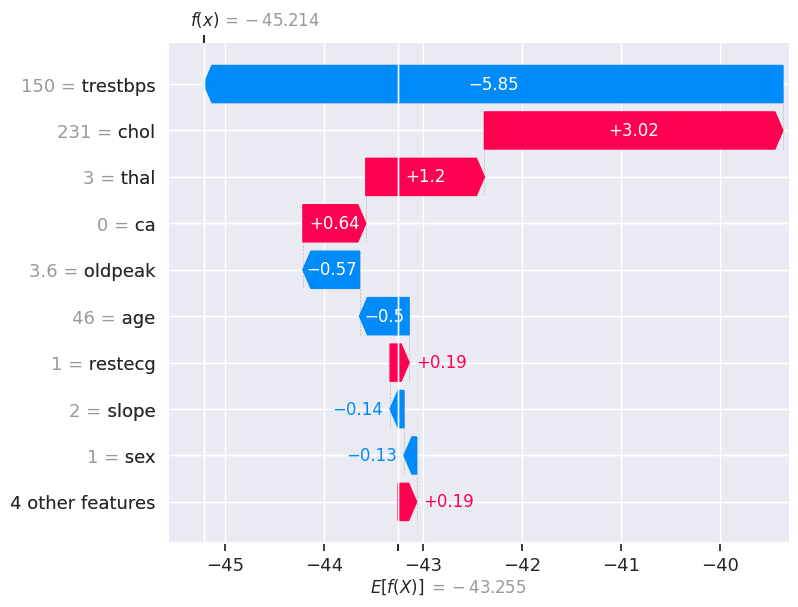

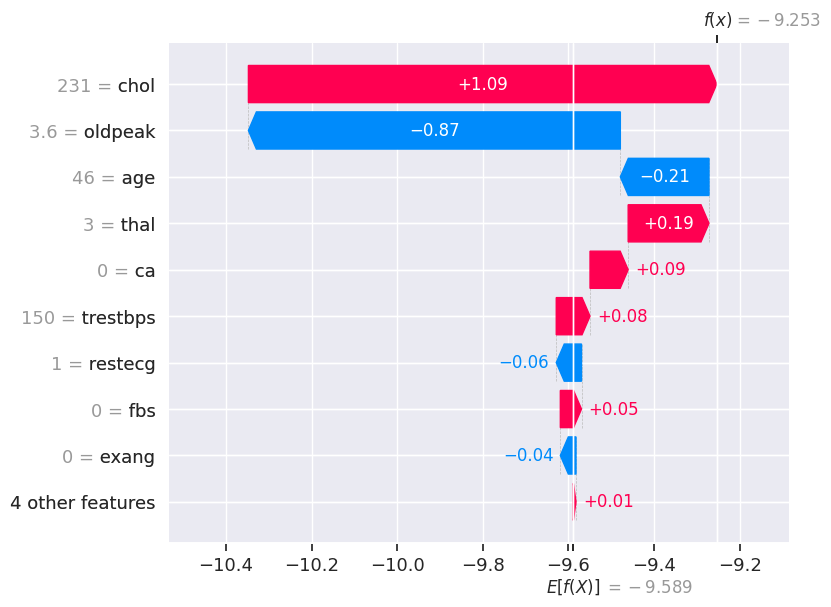

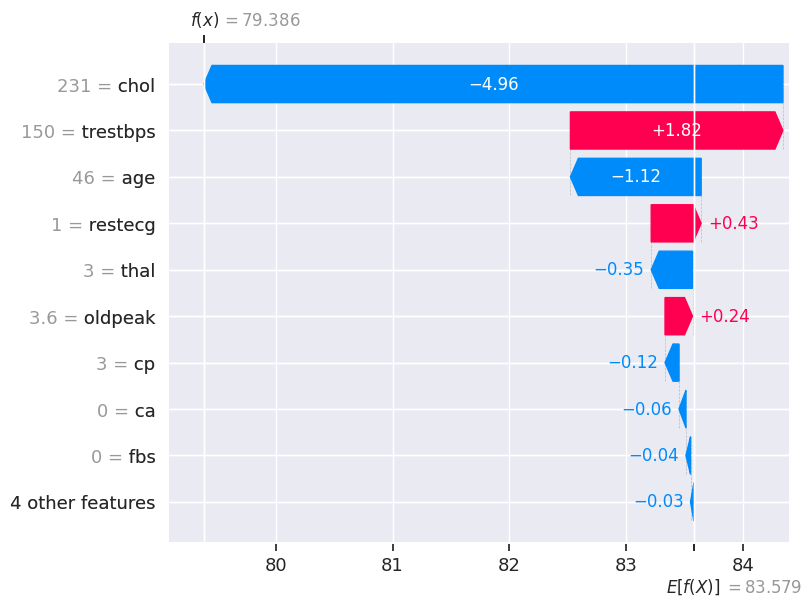

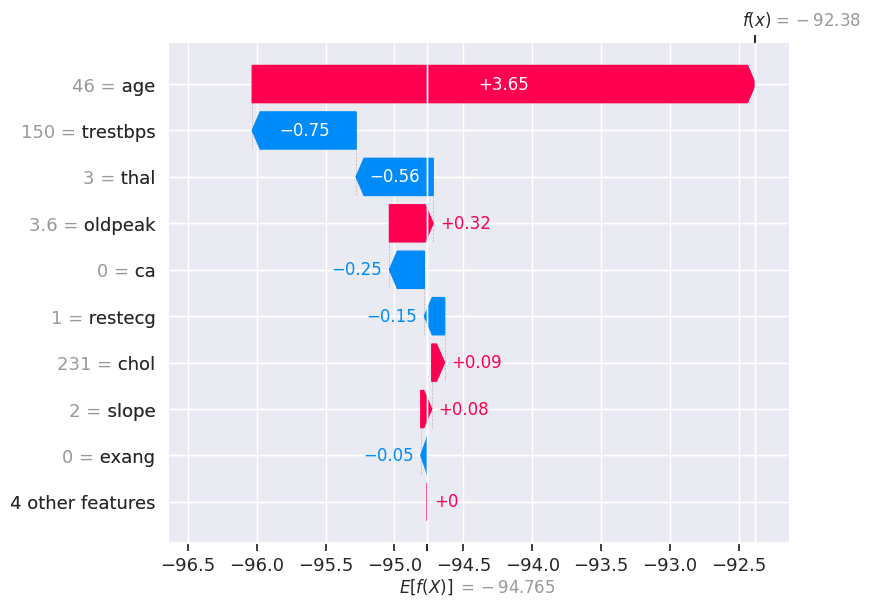

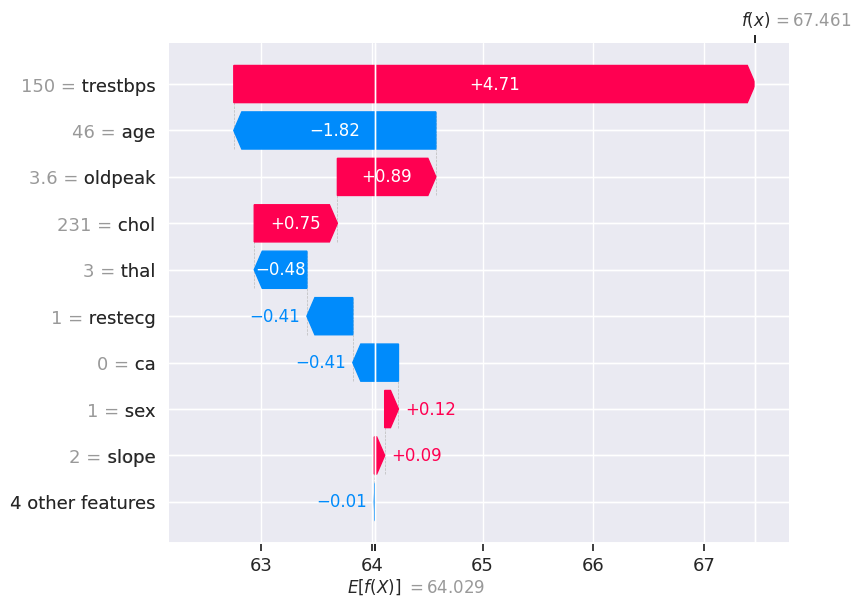

In [51]:
# Plot the SHAP summary plot

# waterfall shap value for 1 observation
shap.plots.waterfall(shap_values[0,:,0])

# waterfall shap value for 2 observation
shap.plots.waterfall(shap_values[0,:,1])

# waterfall shap value for 3 observation
shap.plots.waterfall(shap_values[0,:,2])

# waterfall shap value for 4 observation
shap.plots.waterfall(shap_values[0,:,3])

# waterfall shap value for 5 observation
shap.plots.waterfall(shap_values[0,:,4])


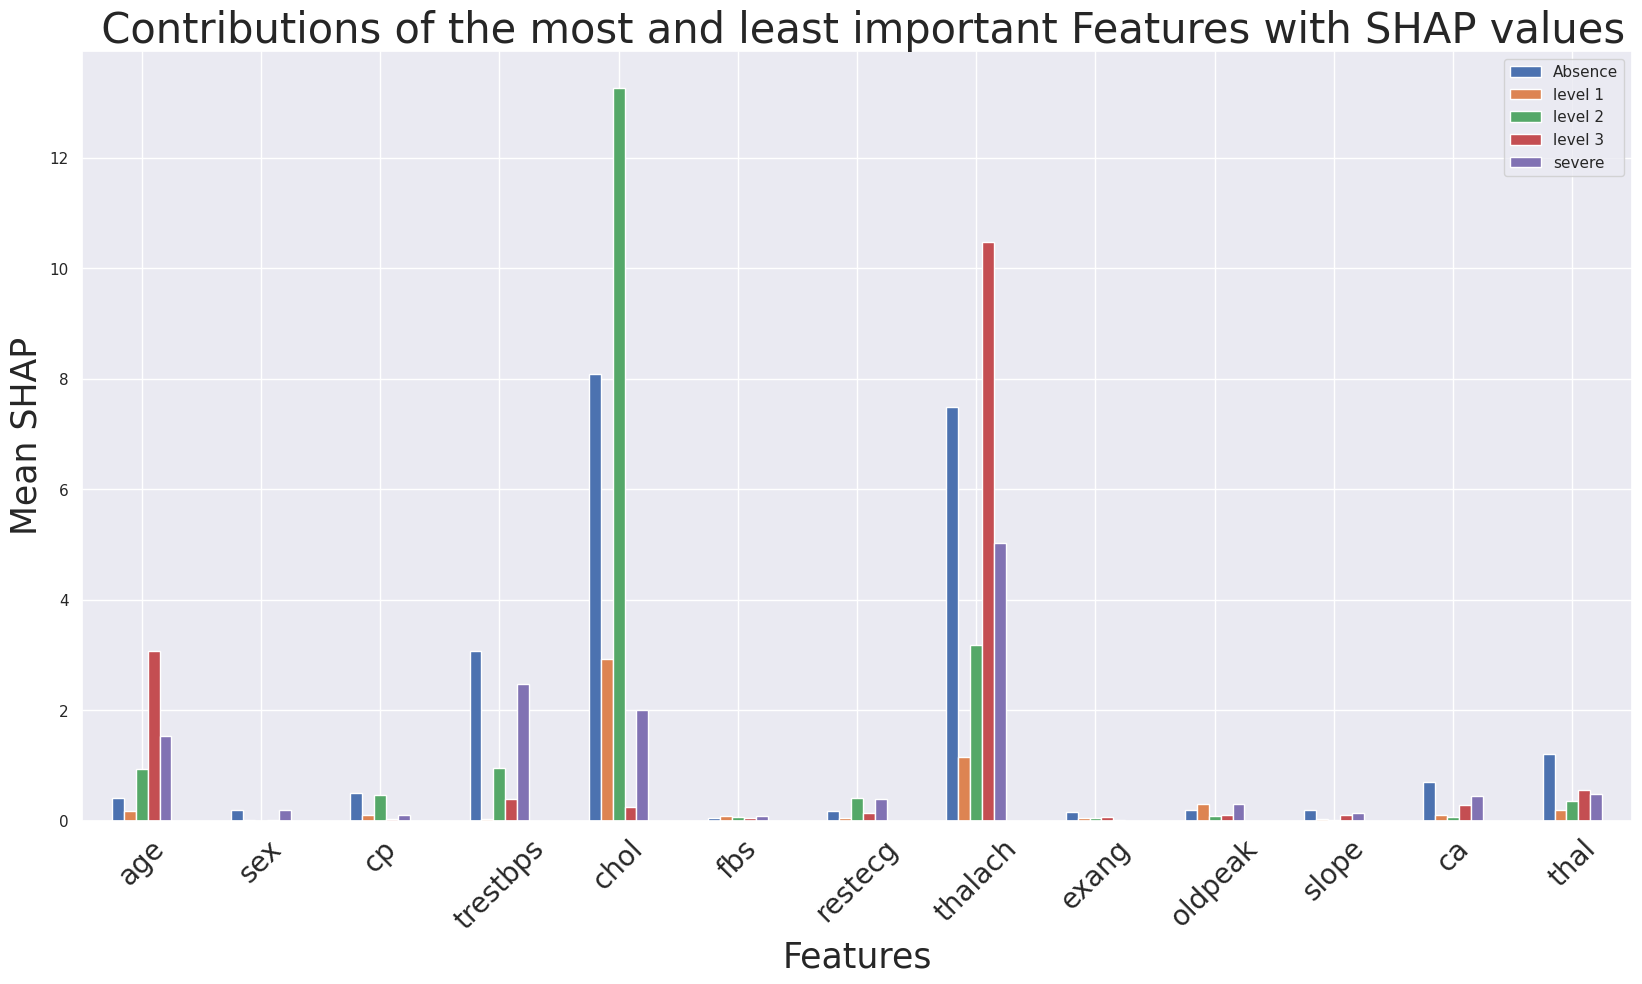

In [52]:
# Calculate the feature importance scores

mean_class0 = np.mean(np.abs(shap_values.values[:,:,0]), axis=0)
mean_class1 = np.mean(np.abs(shap_values.values[:,:,1]), axis=0)
mean_class2 = np.mean(np.abs(shap_values.values[:,:,2]), axis=0)
mean_class3 = np.mean(np.abs(shap_values.values[:,:,3]), axis=0)
mean_class4 = np.mean(np.abs(shap_values.values[:,:,4]), axis=0)

df= pd.DataFrame({"Absence":mean_class0,"level 1":mean_class1,"level 2":mean_class2,"level 3":mean_class3,"severe":mean_class4})

# Plot the feature importance scores
fig,ax=plt.subplots(1,1,figsize =(20,10))
ax.set_ylabel('Mean SHAP',size =25)
ax.set_xlabel('Features',size =25)


plt.title(' Contributions of the most and least important Features with SHAP values',size=30)
df.plot.bar(ax=ax)
ax.set_xticklabels(labels=X.columns,size =20,rotation =45)
plt.show()